In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras.utils as ku
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

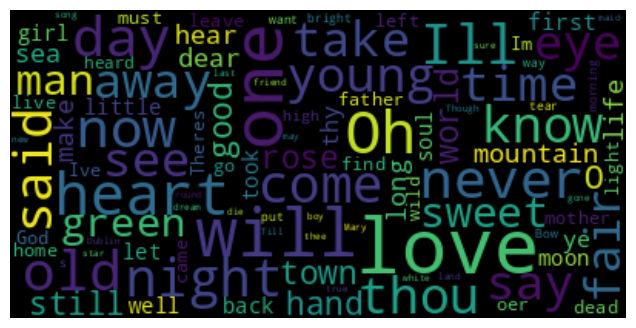

In [ ]:
#reading the text data
data = open('poem.txt', encoding = 'utf8').read()
#EDA wordcloud
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='black').generate(data)
#plotting wordcloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.savefig('WordCloud.png')
plt.show()

In [ ]:
#generating the corpus by splitting the text into lines
corpus = data.lower().split('\n')
print(corpus[:10])

['stay, i said', 'to the cut flowers.', 'they bowed', 'their heads lower.', 'stay, i said to the spider,', 'who fled.', 'stay, leaf.', 'it reddened,', 'embarrassed for me and itself.', 'stay, i said to my body.']


In [ ]:
#fitting the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
#vocabulary count of the corpus
total_words = len(tokenizer.word_index)
print('Total Words: ', total_words)

Total Words:  3807


In [ ]:
# Converting the text into embeddings
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]

    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,
                                         maxlen=max_sequence_len,
                                         padding='pre'))
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]
label = ku.to_categorical(label, num_classes=total_words+1)

In [ ]:
# Building a Bi-Directional LSTM Model
model = Sequential()
model.add(Embedding(total_words+1, 100,
                    input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words+1/2, activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words+1, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 100)           380800    
                                                                 
 bidirectional (Bidirection  (None, 15, 300)           301200    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 3807)              384507    
                                                                 
 dense_1 (Dense)             (None, 3808)              14500864  
                                                        

In [ ]:
history = model.fit(predictors, label, epochs=150, verbose=1) #fit the model

Epoch 1/150
510/510 [==============================] - 23s 30ms/step - loss: 6.9544 - accuracy: 0.0608
Epoch 2/150
510/510 [==============================] - 7s 13ms/step - loss: 6.5125 - accuracy: 0.0639
Epoch 3/150
510/510 [==============================] - 8s 15ms/step - loss: 6.3227 - accuracy: 0.0679
Epoch 4/150
510/510 [==============================] - 6s 12ms/step - loss: 6.1819 - accuracy: 0.0787
Epoch 5/150
510/510 [==============================] - 7s 14ms/step - loss: 6.0579 - accuracy: 0.0877
Epoch 6/150
510/510 [==============================] - 7s 13ms/step - loss: 5.9509 - accuracy: 0.0936
Epoch 7/150
510/510 [==============================] - 6s 13ms/step - loss: 5.8364 - accuracy: 0.1014
Epoch 8/150
510/510 [==============================] - 6s 12ms/step - loss: 5.7377 - accuracy: 0.1072
Epoch 9/150
510/510 [==============================] - 7s 13ms/step - loss: 5.6395 - accuracy: 0.1132
Epoch 10/150
510/510 [==============================] - 6s 11ms/step - loss: 5.54

In [ ]:
#generating text using the model
seed_text = "Artificial Intelligence"
next_words = 25
ouptut_text = ""
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,verbose=0), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Artificial Intelligence the heart wedded to war and gorey were covered corporal casey by by my darlin break rings a first bit me day now he begged
